## **Data Preparation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from pytz import utc
import dateutil


In [2]:
# Load DAtaset
sc=r'C:\Users\fahru\Documents\Python_Code\Cohort\Retail_pos_basket_data.csv.csv'
data= pd.read_csv(sc)
data.head()

,order_id,user_id,order_date,time,order_hour_of_day,product_name,quantity,price,category,product_id
0,1000,341,2024-09-04,15:43:00,15,Wheat Flour,1,333.44,Grains & Staples,457
1,1000,341,2024-09-04,15:43:00,15,Dishwashing Liquid,2,405.92,Household,745
2,1000,341,2024-09-04,15:43:00,15,Pastry,2,114.15,Bakery,849
3,1000,341,2024-09-04,15:43:00,15,Marker,2,171.33,Stationery,599
4,1001,324,2024-03-07,8:45:00,8,Saree,2,41.16,Clothing,329


## **Exploration Data Analysis**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   order_date         10000 non-null  object 
 3   time               10000 non-null  object 
 4   order_hour_of_day  10000 non-null  int64  
 5   product_name       10000 non-null  object 
 6   quantity           10000 non-null  int64  
 7   price              10000 non-null  float64
 8   category           10000 non-null  object 
 9   product_id         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


### Missing Data Handling

In [4]:
# Missing Data check
data.isnull().sum()

order_id             0
user_id              0
order_date           0
time                 0
order_hour_of_day    0
product_name         0
quantity             0
price                0
category             0
product_id           0
dtype: int64

There is no missing data in dataset.

### Data Type Handling

In [5]:
# COnvert Datetime to timestamp
data['timestamp']= data['order_date'].apply(lambda x: dateutil.parser.parse(x).timestamp())
data['year']= data['timestamp'].apply(lambda x: dt.fromtimestamp(x,utc).year)
data['month']= data['timestamp'].apply(lambda x: dt.fromtimestamp(x,utc).month)
data.head()

,order_id,user_id,order_date,time,order_hour_of_day,product_name,quantity,price,category,product_id,timestamp,year,month
0,1000,341,2024-09-04,15:43:00,15,Wheat Flour,1,333.44,Grains & Staples,457,1.725383e+09,2024,9
1,1000,341,2024-09-04,15:43:00,15,Dishwashing Liquid,2,405.92,Household,745,1.725383e+09,2024,9
2,1000,341,2024-09-04,15:43:00,15,Pastry,2,114.15,Bakery,849,1.725383e+09,2024,9
3,1000,341,2024-09-04,15:43:00,15,Marker,2,171.33,Stationery,599,1.725383e+09,2024,9
4,1001,324,2024-03-07,8:45:00,8,Saree,2,41.16,Clothing,329,1.709744e+09,2024,3


In [6]:
data['year'].unique()

array([2024, 2023])

## **Analysis**

In [7]:
# Create Cohort Columns
data['cohort']= data.apply(lambda x : (x['year']*100+x['month']), axis=1)
data.head()

,order_id,user_id,order_date,time,order_hour_of_day,product_name,quantity,price,category,product_id,timestamp,year,month,cohort
0,1000,341,2024-09-04,15:43:00,15,Wheat Flour,1,333.44,Grains & Staples,457,1.725383e+09,2024,9,202409
1,1000,341,2024-09-04,15:43:00,15,Dishwashing Liquid,2,405.92,Household,745,1.725383e+09,2024,9,202409
2,1000,341,2024-09-04,15:43:00,15,Pastry,2,114.15,Bakery,849,1.725383e+09,2024,9,202409
3,1000,341,2024-09-04,15:43:00,15,Marker,2,171.33,Stationery,599,1.725383e+09,2024,9,202409
4,1001,324,2024-03-07,8:45:00,8,Saree,2,41.16,Clothing,329,1.709744e+09,2024,3,202403


In [8]:
# Create First Cohort Columns
fc= data.groupby('user_id')['cohort'].min().reset_index()
fc.columns= ['user_id','first_cohort']
data= data.merge(fc, on='user_id', how='left')
data.head()

,order_id,user_id,order_date,time,order_hour_of_day,product_name,quantity,price,category,product_id,timestamp,year,month,cohort,first_cohort
0,1000,341,2024-09-04,15:43:00,15,Wheat Flour,1,333.44,Grains & Staples,457,1.725383e+09,2024,9,202409,202405
1,1000,341,2024-09-04,15:43:00,15,Dishwashing Liquid,2,405.92,Household,745,1.725383e+09,2024,9,202409,202405
2,1000,341,2024-09-04,15:43:00,15,Pastry,2,114.15,Bakery,849,1.725383e+09,2024,9,202409,202405
3,1000,341,2024-09-04,15:43:00,15,Marker,2,171.33,Stationery,599,1.725383e+09,2024,9,202409,202405
4,1001,324,2024-03-07,8:45:00,8,Saree,2,41.16,Clothing,329,1.709744e+09,2024,3,202403,202401


In [9]:
# Create Cohort Head (For COhort Distance Analysis)
head= data['cohort'].value_counts().reset_index()
head= head.sort_values('cohort')['cohort'].tolist()
head

[202312,
 202401,
 202402,
 202403,
 202404,
 202405,
 202406,
 202407,
 202408,
 202409,
 202410,
 202411,
 202412]

In [10]:
# Calculated Cohort Distance
data['cohort_distance']= data.apply(lambda x : (head.index(x['cohort'])-head.index(x['first_cohort']))\
                                    if (x['cohort']!=0 and x['first_cohort']!=0) else np.nan, axis=1)
data.head()

,order_id,user_id,order_date,time,order_hour_of_day,product_name,quantity,price,category,product_id,timestamp,year,month,cohort,first_cohort,cohort_distance
0,1000,341,2024-09-04,15:43:00,15,Wheat Flour,1,333.44,Grains & Staples,457,1.725383e+09,2024,9,202409,202405,4
1,1000,341,2024-09-04,15:43:00,15,Dishwashing Liquid,2,405.92,Household,745,1.725383e+09,2024,9,202409,202405,4
2,1000,341,2024-09-04,15:43:00,15,Pastry,2,114.15,Bakery,849,1.725383e+09,2024,9,202409,202405,4
3,1000,341,2024-09-04,15:43:00,15,Marker,2,171.33,Stationery,599,1.725383e+09,2024,9,202409,202405,4
4,1001,324,2024-03-07,8:45:00,8,Saree,2,41.16,Clothing,329,1.709744e+09,2024,3,202403,202401,2


In [11]:
# Create Cohort Label
data['label']= pd.to_datetime(data['first_cohort'], format='%Y%m')
data['label']= data['label'].dt.strftime('%b %y')
label= data['label'].value_counts()
labels= pd.DataFrame(label)
labels.columns=['cohort size']
labels

,cohort size
label,
Jan 24,3598
Feb 24,1857
Mar 24,1721
Apr 24,973
May 24,580
Jun 24,457
Aug 24,232
Jul 24,231
Dec 23,125


In [12]:
#  Create Pivot Cohort
pivot= pd.pivot_table(data, index='first_cohort', columns='cohort_distance',
                      values='order_id', aggfunc= pd.Series.nunique)
pivot= pivot.div(pivot[0], axis=0)
pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
202312,1.0,0.800000,0.200000,0.600000,0.600000,0.200000,NaN,NaN,0.600000,0.400000,0.200000,0.200000,0.4
202401,1.0,0.288043,0.250000,0.266304,0.277174,0.260870,0.271739,0.260870,0.222826,0.282609,0.293478,0.217391,NaN
202402,1.0,0.184466,0.262136,0.310680,0.194175,0.213592,0.242718,0.223301,0.310680,0.281553,0.233010,NaN,NaN
202403,1.0,0.200000,0.300000,0.322222,0.400000,0.388889,0.322222,0.277778,0.255556,0.355556,NaN,NaN,NaN
202404,1.0,0.418182,0.327273,0.363636,0.381818,0.345455,0.272727,0.163636,0.290909,NaN,NaN,NaN,NaN
202405,1.0,0.500000,0.200000,0.275000,0.350000,0.350000,0.250000,0.200000,NaN,NaN,NaN,NaN,NaN
202406,1.0,0.343750,0.281250,0.281250,0.281250,0.250000,0.406250,NaN,NaN,NaN,NaN,NaN,NaN
202407,1.0,0.400000,0.150000,0.200000,0.350000,0.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202408,1.0,0.333333,0.388889,0.444444,0.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Result**

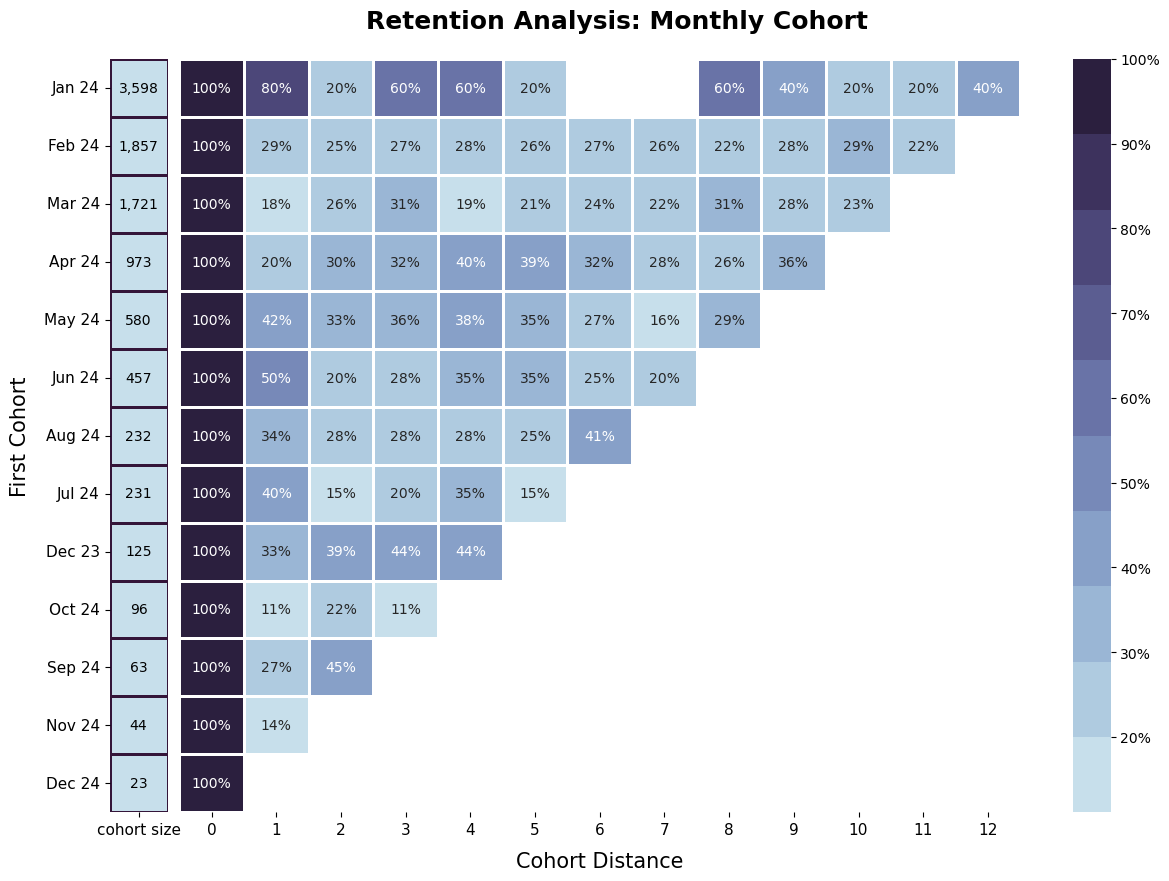

In [13]:
# Visalize result

fig, ax= plt.subplots(1,2, figsize=(12,8), gridspec_kw={'width_ratios':[1,11]},sharey='row')

sns.heatmap(pivot, annot=True, fmt='.0%',mask=pivot.isnull(), annot_kws={'size':10},
            ax=ax[1], linewidths=2, cmap=sns.color_palette("ch:s=.25,rot=-.25",(10)),
            cbar_kws={'format':'{x:.0%}'})
ax[1].set_xlabel('Cohort Distance', labelpad=10, size=15)
ax[1].set_ylabel("")
ax[1].tick_params(axis='x', labelsize=11)
ax[1].tick_params(left=False)

sns.heatmap(labels, annot=True, fmt=',', ax=ax[0], cbar=False,
            annot_kws={'color':'black'}, cmap=sns.color_palette('ch:s=.25,rot=-.25',1),
            linewidths=2 , linecolor='#341539',square=True)
ax[0].set_ylabel('First Cohort', labelpad=10, size=15)
ax[0].tick_params(axis='both', labelsize=11)


plt.suptitle('Retention Analysis: Monthly Cohort',y=1.06,size=18,weight='bold')
fig.tight_layout(pad=-1)
plt.show()